In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
from sklearn.manifold import TSNE
import plotly.express as px 
import umap 

c:\Users\yee88\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)

assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# Data Understanding 
- This is a dataset of 50000 training images and 10,000 test images 
- Each image is 32x32x3 (LxWxH)
- Exists in both 100 classes and 20 classes of normal  day objects such as apple, bed, bicycle etc

In [5]:
label_mapping={
0:'airplane' 	,									
1:'automobile' 		,								
2:'bird' 		,								
3:'cat'		,								
4:'deer' 		,								
5:'dog' 		,								
6:'frog' 		,								
7:'horse' 		,								
8:'ship' 		,								
9:'truck',}

n_classes = 100
eday_train = np.squeeze(y_train)


### Overview of 10 classes

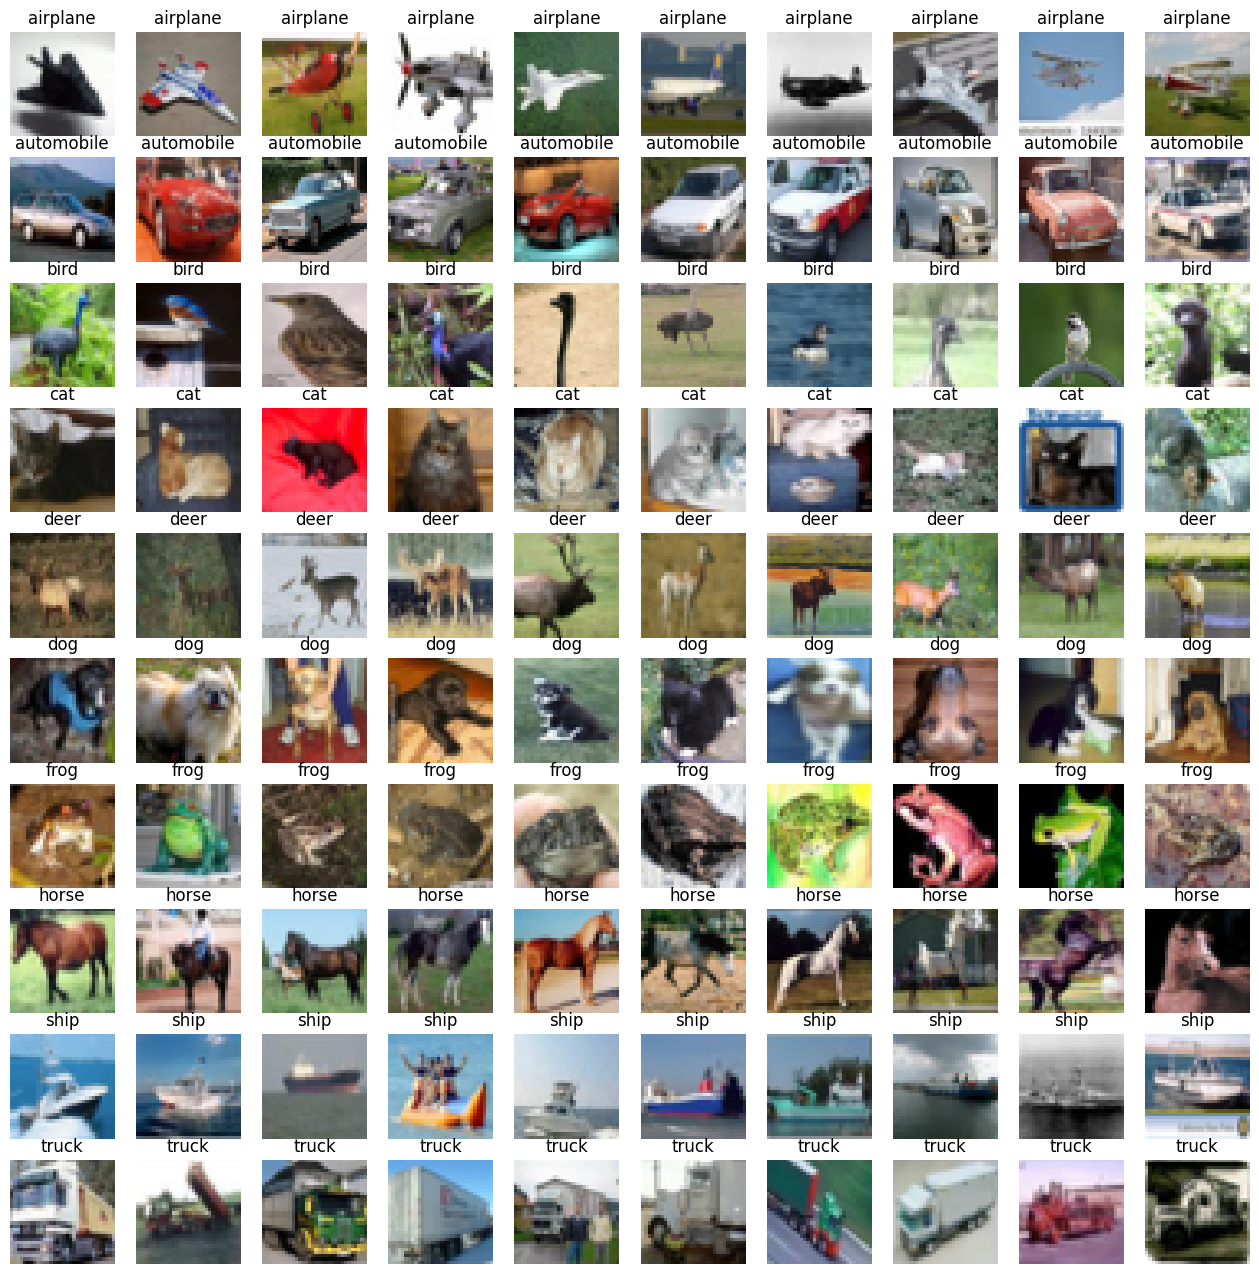

In [8]:
fig, axes = plt.subplots(10,10 , figsize = (16,16))


for i in range(10):
    for j in range(10 ):
        ax = axes[i,j]
            
        pic = x_train[eday_train == i ][j]
        ax.axis('off')
        ax.imshow(pic)
        ax.set_title(label_mapping[i])
    

plt.show()

####  Problem : Image resolution
- The image resolution is very blurry, which will impede the quality of images generated
- For Example, I cant tell what is in some of the images, for example, the right most frog in the picture



In [10]:
tsne = TSNE(n_components=2, random_state=42, verbose = 1 , n_jobs = -1  , learning_rate = 500)
num_images,height,width , channels = x_train.shape
flattened_images = x_train.reshape((num_images, height*width*channels ))
reduced = tsne.fit_transform(flattened_images  )
reduced_df = pd.DataFrame(columns=['Componenent1', 'Componenent2', 'target'],
                       data=np.column_stack((reduced, 
                                            eday_train)))


# sns.scatterplot( data =reduced_df,  x= 'Componenent1' , y = 'Componenent2' , hue = 'target' )
# eda_y_train = np.squeeze(y_train)

px.scatter(reduced_df, x='Componenent1', y='Componenent2', opacity  = 0.1,
              color='target'   , width = 900 ,height= 500 ).update_layout( margin=dict(l=20, r=10, t=10, b=0) ).show()

c:\Users\yee88\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.121s...


KeyboardInterrupt: 

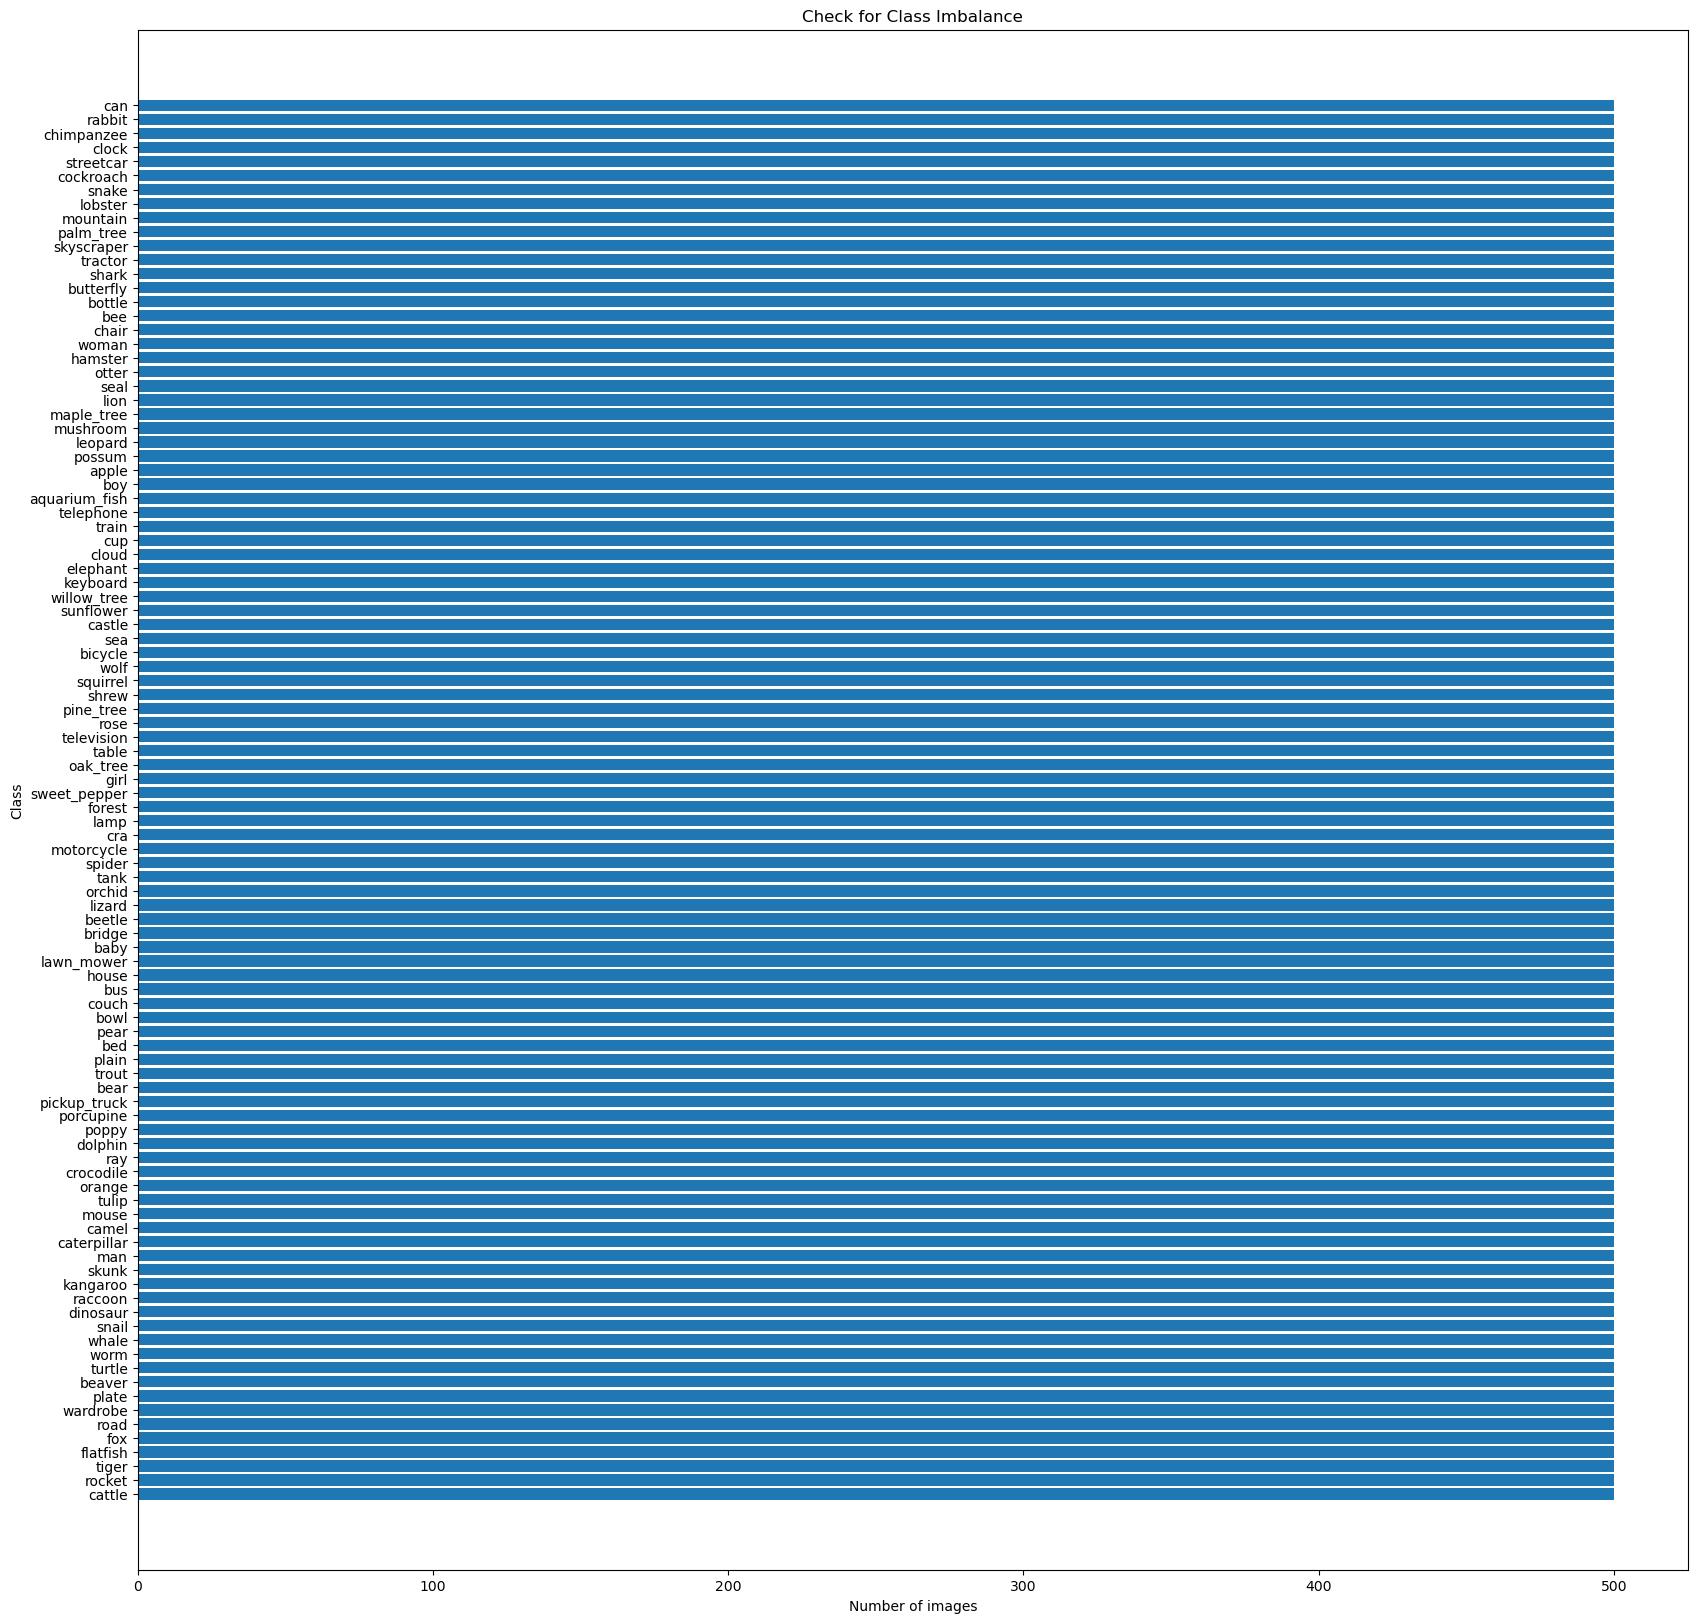

In [6]:
eda_y_train = np.squeeze(y_train)

counts = pd.Series(eda_y_train).apply(label_mapping.get).value_counts()
plt.figure(figsize = (20, 20))
plt.barh(counts.index, counts )
plt.title('Check for Class Imbalance')
plt.ylabel('Class')
plt.xlabel('Number of images')
plt.show()

> Lack of data
- The 100 classes task has only 500 images per class, making the data prone to overfitting

> Class balance/imbalance
- No Class imbalance, making accuracy as main metric to be used

In [3]:
(x_train_20, y_train_20), (x_test_20, y_test_20) = tf.keras.datasets.cifar100.load_data('coarse')
assert x_train.shape == (50000, 32, 32, 3)

assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)


label_mapping_20 ={ 0: 'aquatic_mammals',

1: 'fish',

2: 'flowers',

3: 'food_containers',

4: 'fruit_and_vegetables',

5: 'household_electrical_devices',

6: 'household_furniture',

7: 'insects',

8: 'large_carnivores',

9: 'large_man-made_outdoor_things',

10: 'large_natural_outdoor_scenes',

11: 'large_omnivores_and_herbivores',
12: 'medium_mammals',

13: 'non-insect_invertebrates',

14: 'people',

15: 'reptiles',

16: 'small_mammals',

17: 'trees',

18:' vehicles_1',

19: 'vehicles_2'}

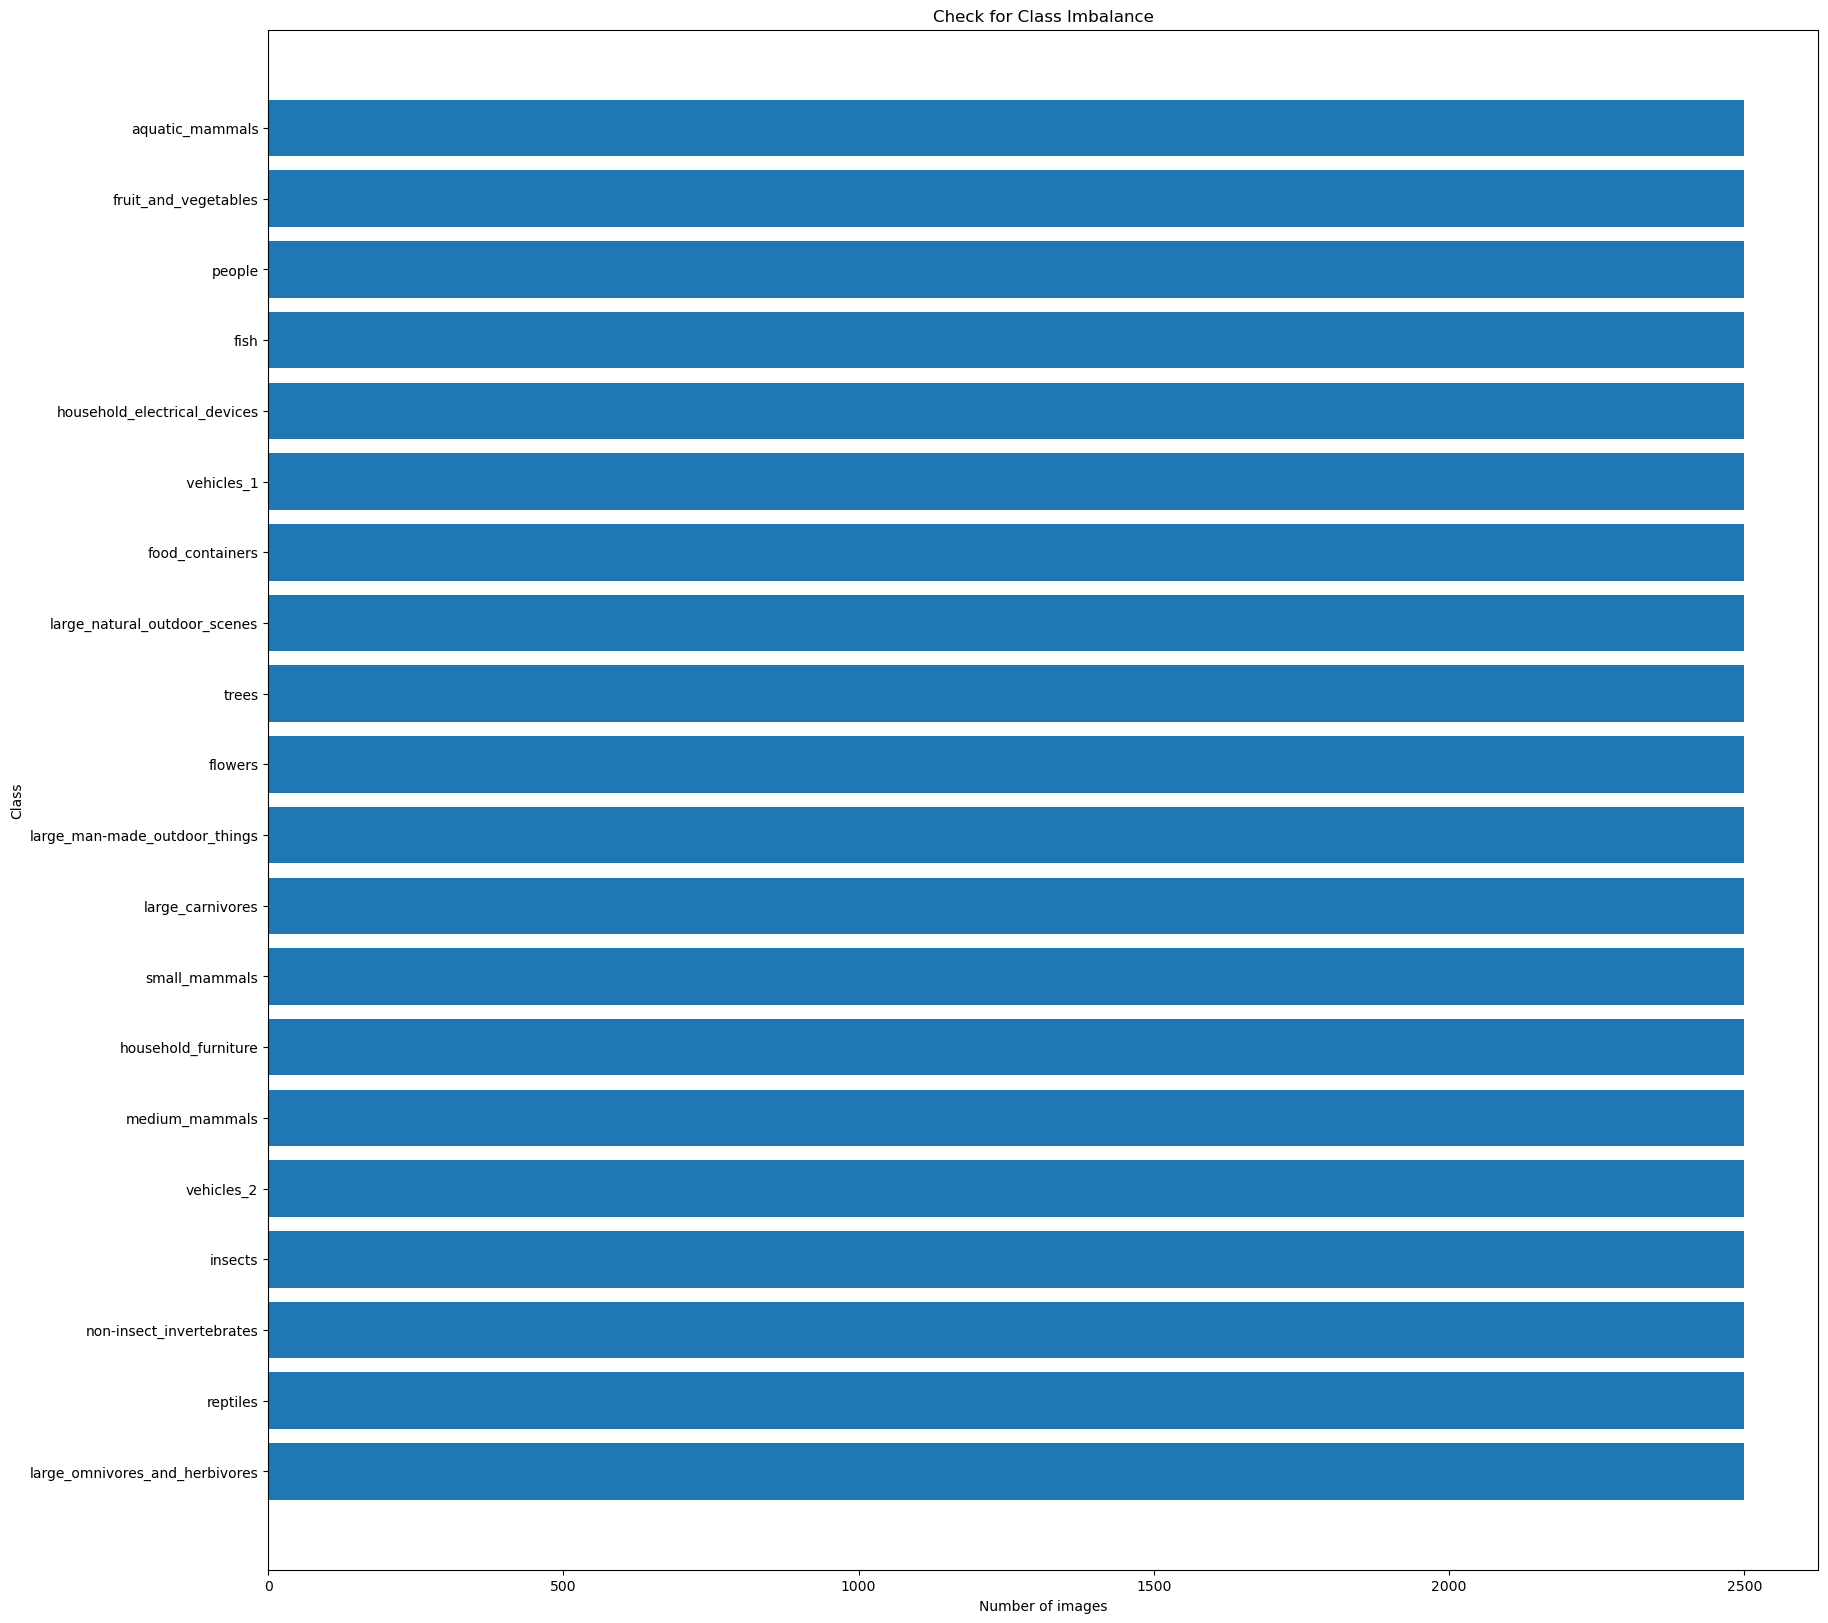

In [16]:
eda_y_train_20 = np.squeeze(y_train_20)

counts = pd.Series(eda_y_train_20).apply(label_mapping_20.get).value_counts()
plt.figure(figsize = (20, 20))
plt.barh(counts.index, counts )
plt.title('Check for Class Imbalance')
plt.ylabel('Class')
plt.xlabel('Number of images')
plt.show()

- No Class imbalance for 20 classes making accuracy the main metric for modelling
- The 20 classes task has 2500 images per class making it easier than the 100 classes task. 

In [16]:
m = umap.UMAP(n_components=2, random_state=42)
num_images,height,width , channels = x_train.shape
flattened_images = x_train.reshape((num_images, height*width*channels ))
reduced = m.fit_transform(flattened_images  )
reduced_df = pd.DataFrame(columns=['Componenent1', 'Componenent2', 'target'],data=np.column_stack((reduced,y_train_20)))
reduced_df.target = reduced_df.target.astype('str')
# sns.scatterplot( data =reduced_df,  x= 'Componenent1' , y = 'Componenent2' , hue = 'target' )
# eda_y_train = np.squeeze(y_train)



### Modelling - Data Preprocessing (code in the notebooks that contain the  models)

> Divide the pixel values by 255
- leads to faster computation when values are in range of 0 to 1 instead of 0 to 255


### Modelling - spliting the data (code in the notebooks that contain the models)
- Split the training data into train and validation with sklearn's `train_test_split` with a split size of 0.2
- Validation set used to evaluate if model generalise to unseen data


# To continue, Please kindly refer to the baseline notebook